# 5.1 Introduction to pandas Data Structures

## Series

A Series is a **one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index**

The simplest Series is formed from only an array of data:

In [2]:
import pandas as pd

In [3]:
obj = pd.Series([4, 7, -5, 3])

In [4]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

The string representation of a Series displayed interactively shows the **index on the left and the values on the right**

Since we did not specify an index for the data, a default one consisting of the integers 0 through N - 1

You can get the array representation and index object of the Series via its values and index attributes, respectively:

In [5]:
obj.values

array([ 4,  7, -5,  3])

In [6]:
obj.index

RangeIndex(start=0, stop=4, step=1)

Often it will be desirable to create a Series with an index identifying each data point with a label:

In [7]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [8]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [9]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

Compared with NumPy arrays, **you can use labels in the index when selecting single values or a set of values**:

In [10]:
obj2['a']

-5

In [11]:
obj2['d']

4

In [12]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    4
dtype: int64

Here ['c', 'a', 'd'] is interpreted as a list of indices, even though it contains strings instead of integers

Using NumPy functions or NumPy-like operations, such as filtering with a boolean array, scalar multiplication, or applying math functions, will preserve the index-value link:

In [13]:
obj2[obj2 > 0]

d    4
b    7
c    3
dtype: int64

In [14]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [15]:
import numpy as np
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Another way to think about a Series is as a fixed-length, ordered dict, as it is a mapping of index values to data values

It can be used in many contexts where you might use a dict:

In [16]:
'b' in obj2

True

In [17]:
'e' in obj2

False

Should you have data contained in a Python dict, you can **create a Series from it by passing the dict**:

In [18]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [19]:
obj3 = pd.Series(sdata)

In [20]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

When you are only passing a dict, the index in the resulting Series will have the dict’s keys in sorted order

You can override this by passing the dict keys in the order you want them to appear in the resulting Series:

In [21]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [22]:
obj4 = pd.Series(sdata, index=states)

In [23]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Here, three values found in sdata were placed in the appropriate locations, but since no value for 'California' was found, it appears as NaN (not a number), which is considered in pandas to mark missing or NA values

Since 'Utah' was not included in states, it is excluded from the resulting object

**The isnull and notnull functions in pandas should be used to detect missing data:**

In [24]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [25]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series also has these as instance methods:

In [26]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

A useful Series feature for many applications is that it automatically aligns by index label in arithmetic operations:

In [27]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [28]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [29]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Both the Series object itself and its index have a name attribute, which integrates with other key areas of pandas functionality:

In [30]:
obj4.name = 'population'

In [31]:
obj4.index.name = 'state'

In [32]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

A Series’s index can be altered in-place by assignment:

In [33]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [34]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [35]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

## DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type

The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index

Under the hood, **the data is stored as one or more two-dimensional blocks** rather than a list, dict, or some other collection of one-dimensional arrays

There are many ways to construct a DataFrame, though one of the most common is **from a dict of equal-length lists or NumPy arrays**:

In [36]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [37]:
frame = pd.DataFrame(data)

The resulting DataFrame will have its index assigned automatically as with Series, and the columns are placed in sorted order:

In [38]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


For large DataFrames, the head method selects only the first five rows:

In [39]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


If you specify a sequence of columns, the DataFrame’s columns will be arranged in that order:

In [40]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


If you pass a column that isn’t contained in the dict, it will appear with missing values in the result:

In [41]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                      'five', 'six'])

In [42]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [43]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute:

In [44]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [45]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

Note that the returned Series have the same index as the DataFrame, and their name attribute has been appropriately set

Rows can also be retrieved by position or name with the special loc attribute:

In [46]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

Columns can be modified by assignment. For example, the empty 'debt' column could be assigned a scalar value or an array of values:

In [47]:
frame2['debt'] = 16.5

In [48]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [49]:
frame2['debt'] = np.arange(6.)

In [50]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


When you are assigning lists or arrays to a column, the value’s length must match the length of the DataFrame

If you assign a Series, its labels will be realigned exactly to the DataFrame’s index, inserting missing values in any holes:

In [51]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [52]:
frame2['debt'] = val

In [53]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Assigning a column that doesn’t exist will create a new column. The del keyword will delete columns as with a dict

As an example of del, I first add a new column of boolean values where the state column equals ' Ohio':

In [54]:
frame2['eastern'] = frame2.state == 'Ohio'

In [55]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


The del method can then be used to remove this column:

In [56]:
del frame2['eastern']

In [57]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Another common form of data is a nested dict of dicts:

In [58]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

If the nested dict is passed to the DataFrame, pandas will interpret the outer dict keys as the columns and the inner keys as the row indices:

In [59]:
frame3 = pd.DataFrame(pop)

In [60]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


You can transpose the DataFrame (swap rows and columns) with similar syntax to a NumPy array:

In [61]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


The keys in the inner dicts are combined and sorted to form the index in the result. This isn’t true if an explicit index is specified:

In [62]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


Dicts of Series are treated in much the same way:

In [63]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}

In [64]:
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


If a DataFrame’s index and columns have their name attributes set, these will also be displayed:

In [65]:
frame3.index.name = 'year' ; frame3.columns.name = 'state'

In [66]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


As with Series, the values attribute returns the data contained in the DataFrame as a two-dimensional ndarray:

In [67]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

If the DataFrame’s columns are different dtypes, the dtype of the values array will be chosen to accommodate all of the columns:

In [68]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

For a complete list of things you can pass the DataFrame constructor, see Table 5-1

Table 5-1. Possible data inputs to DataFrame constructor
<p align='center'>
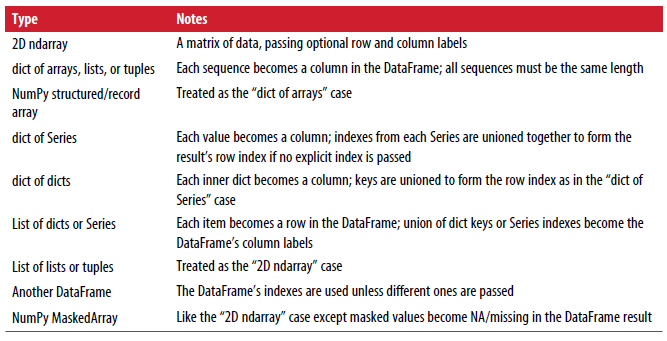
</p>

## Index Objects

pandas’s Index objects are **responsible for holding the axis labels and other metadata** (like the axis name or names)

Any array or other sequence of labels you use when constructing a Series or DataFrame is internally converted to an Index:

In [69]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [70]:
index = obj.index

In [71]:
index

Index(['a', 'b', 'c'], dtype='object')

In [72]:
index[1:]

Index(['b', 'c'], dtype='object')

Index objects are immutable and thus can’t be modified by the user:

In [73]:
try:
  index[1] = 'd'
except TypeError:
  print('TypeError')

TypeError


Immutability makes it safer to share Index objects among data structures:

In [74]:
labels = pd.Index(np.arange(3))

In [75]:
labels

Int64Index([0, 1, 2], dtype='int64')

In [76]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)

In [77]:
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In addition to being array-like, an Index also behaves like a fixed-size set:

In [78]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [79]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [80]:
'Ohio' in frame3.columns

True

In [81]:
2003 in frame3.index

False

Unlike Python sets, a pandas Index can contain duplicate labels:

In [82]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

In [83]:
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Selections with duplicate labels will select all occurrences of that label

Each Index has a number of methods and properties for set logic, which answer other common questions about the data it contains. Some useful ones are summarized in Table 5-2

Table 5-2. Some Index methods and properties
<p align='center'>
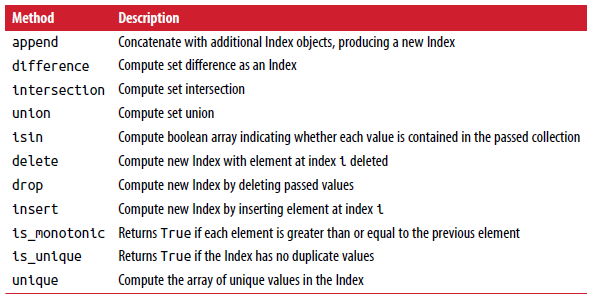
</p>

# 5.2 Essential Functionality

##Reindexing

An important method on pandas objects is reindex, which means to **create a new object with the data conformed to a new index**. Consider an example:

In [84]:
obj = pd.Series([4.5, 7.3, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [85]:
obj

d    4.5
b    7.3
a   -5.3
c    3.6
dtype: float64

Calling reindex on this Series rearranges the data according to the new index, introducing missing values if any index values were not already present:

In [86]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [87]:
obj2

a   -5.3
b    7.3
c    3.6
d    4.5
e    NaN
dtype: float64

For ordered data like time series, it may be desirable to do some interpolation or filling of values when reindexing

The method option allows us to do this, using a method such as ffill, which forward-fills the values:

In [88]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [89]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [90]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

**With DataFrame, reindex can alter either the (row) index, columns, or both**

When passed only a sequence, it reindexes the rows in the result:

In [91]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])

In [92]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [93]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [94]:
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


The columns can be reindexed with the columns keyword:

In [95]:
states = ['Texas', 'Utah', 'California']

In [96]:
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


See Table 5-3 for more about the arguments to reindex.

Table 5-3. reindex function arguments
<p align='center'>
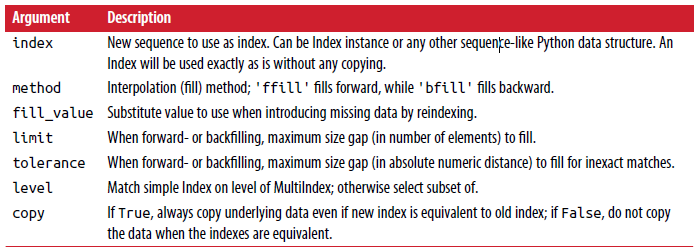
</p>

## Dropping Entries from an Axis

The drop method will return a new object with the indicated value or values deleted from an axis:

In [97]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [98]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [99]:
new_obj = obj.drop('c')

In [100]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [101]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

With DataFrame, index values can be deleted from either axis. To illustrate this, we first create an example DataFrame:

In [102]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index=['Ohio', 'Colorado', 'Utah', 'New York',],
                    columns=['one', 'two', 'three', 'four'])

In [103]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Calling drop with a sequence of labels will drop values from the row labels (axis 0):

In [104]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


You can drop values from the columns by passing axis=1 or axis= 'columns':

In [105]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [106]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


Many functions, like drop, which modify the size or shape of a Series or DataFrame, **can manipulate an object in-place without returning a new object**:

Be careful with the inplace, as it destroys any data that is dropped

In [107]:
obj.drop('c', inplace=True)

In [108]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

## Indexing, Selection, and Filtering

Series indexing (obj[...]) works analogously to NumPy array indexing, except **you can use the Series’s index values instead of only integers:**



In [109]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [110]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [111]:
obj['b']

1.0

In [112]:
obj[1]

1.0

In [113]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [114]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [115]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [116]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

Slicing with labels behaves differently than normal Python slicing in that **the end point is inclusive:**

In [117]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

Setting using these methods modifies the corresponding section of the Series:

In [118]:
obj['b':'c'] = 5

In [119]:
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

Indexing into a DataFrame is for retrieving one or more columns either with a single value or sequence:

In [120]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [121]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [122]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [124]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Indexing like this has a few special cases. First, slicing or selecting data with a boolean array:

In [125]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [128]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Another use case is in indexing with a boolean DataFrame, such as one produced by a scalar comparison:

In [131]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [134]:
data[data < 5] = 0

In [135]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


This makes DataFrame syntactically more like a two-dimensional NumPy array in this particular case

### Selection with loc and iloc

For DataFrame label-indexing on the rows, I introduce the special indexing operators loc and iloc

They enable you to **select a subset of the rows and columns from a DataFrame with NumPy-like notation** using either **axis labels (loc)** or **integers (iloc)**

In [138]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

We’ll then perform some similar selections with integers using iloc:

In [139]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [140]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [145]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


Both indexing functions work with slices in addition to single labels or lists of labels:

In [146]:
data.loc[: 'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [147]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


So there are many ways to select and rearrange the data contained in a pandas object. For DataFrame, Table 5-4 provides a short summary of many of them

Table 5-4. Indexing options with DataFrame
<p align='center'>
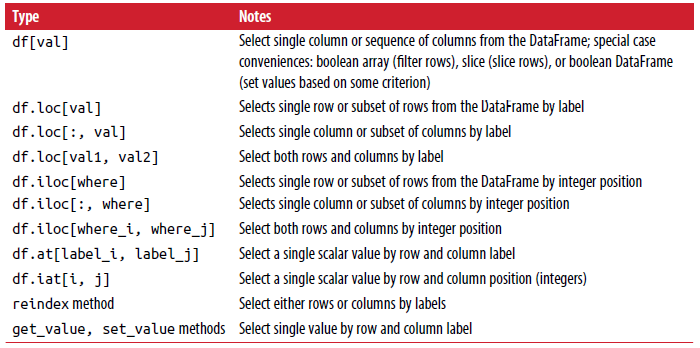
</p>

## Integer Indexes

Working with pandas objects indexed by integers is something that often trips up new users due to some differences with indexing semantics on built-in Python data structures like lists and tuples

For example, you might not expect the following code to generate an error:

In [148]:
ser = pd.Series(np.arange(3.))

In [150]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [167]:
try:
  ser[-1]
except (ValueError, KeyError):
  print('ValueError', 'KeyError')

ValueError KeyError


In this case, pandas could “fall back” on integer indexing, but it’s difficult to do this in general without introducing subtle bugs

Here we have an index containing 0, 1, 2, but inferring what the user wants (label-based indexing or position-based) is difficult:

In [168]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

On the other hand, with a non-integer index, there is no potential for ambiguity:

In [169]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

In [170]:
ser2[-1]

2.0

To keep things consistent, **if you have an axis index containing integers, data selection will always be label-oriented**

For more precise handling, use loc (for labels) or iloc (for integers):

In [172]:
ser[:1]

0    0.0
dtype: float64

In [174]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [175]:
ser.iloc[:1]

0    0.0
dtype: float64

## Arithmetic and Data Alignment